In [88]:
import numpy as np # linear algebra
import pandas as pd #import pandas 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

from datetime import date
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

### Import data and check info in dataframe ###

In [2]:
data_description = pd.read_csv('./Marketing+Data/marketing_data_dictionary.csv')
main_df = pd.read_csv('./Marketing+Data/marketing_data.csv')

In [3]:
data_description

,Field,Description
0,ID,Customer's unique identifier
1,Year_Birth,Customer's birth year
2,Education,Customer's education level
3,Marital_Status,Customer's marital status
4,Income,Customer's yearly household income
5,Kidhome,Number of children in customer's household
6,Teenhome,Number of teenagers in customer's household
7,Dt_Customer,Date of customer's enrollment with the company
8,Recency,Number of days since customer's last purchase
9,MntWines,Amount spent on wine in the last 2 years


In [4]:
#creat a copy of the original dataset
df = main_df.copy()

In [5]:
#check the shape of the datase 
print("Shape of the DataFrame is :",df.shape)

Shape of the DataFrame is : (2240, 28)


In [6]:
#Check the column in the dataset 
print("Columns in the DataFrame are : \n", df.columns)

Columns in the DataFrame are : 
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [7]:
#remove the whitesapce in column name 
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [8]:
#check the data type in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data cleanning ###

In [10]:
#find all the missing value in this dataset
total_missing = df.isnull().sum().sort_values(ascending = False)
total_missing

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

In [11]:
#fill the missing income value with median income 
df['Income'] = df['Income'].fillna(df['Income'].median())

In [12]:
#check if there is any null value in the dataframe after fill the missing income with median income
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Response               False
Complain               False
Country                False
dtype: bool

In [13]:
#check duplicates value
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country


In [14]:
#check if there are any data with persistence value that we do not need in our dataframe
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [15]:
#find the value of the second highest income to remove the outlier in the data set 
df[df['Income']>69000].sort_values(by='Income',ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,Saudi Arabia
731,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0,Spain
497,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0,USA
853,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0,Spain
2204,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0,India
325,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0,Saudi Arabia
1925,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Canada
1826,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,Spain
210,4619,1945,PhD,Single,113734.0,0,0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,1,0,0,0,0,0,0,0,Spain
832,4611,1970,Graduation,Together,105471.0,0,0,2013-01-21,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,1,0,Spain


In [16]:
# remove the outlier 
df = df.drop(df[df['ID'] == 9432].index)

## **Marketing Analysis:** ##

### Find the average rate of reponses per visits based on different variances ###

#### find the response rate ####

In [18]:
# List of columns to sum
columns_to_sum = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

# Create new column 'total_response' by summing the specified columns
df['total_response'] = df[columns_to_sum].sum(axis=1)

In [19]:
#calculate the response rate 
df['response_rate'] = df['total_response']/df['NumWebVisitsMonth']

#### Find if income plays a big role on the campaign responses ####

In [20]:
df[['total_response','Income']].corr()

,total_response,Income
total_response,1.00000,0.34228
Income,0.34228,1.00000


In this context, a correlation of 0.34228 indicates that there is a moderate tendency 
or higher income levels to be associated with higher total response rates, 
but the relationship is not extremely strong.

### Now let's dive deep into how income plays a role in the response of campaign ###

#### Response VS Income #####

In [22]:
# Rearrange customer into different group based on the income 
# Define income group bins and labels
income_bins = [0, 36000, 52000, 69000, 163000]
income_labels = ['Low', 'Lower-Medium', 'Upper-Medium', 'High']

# Create a new column 'Income_Group' based on income bins
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

In [23]:
#check if income labels have been applied to all ID 
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Response               False
Complain               False
Country                False
total_response         False
response_rate           True
Income_Group           False
dtype: bool

In [56]:
#find the average response times of different income group 
Income_Response = df.groupby('Income_Group')['total_response'].agg(['mean', 'sum','median']).reset_index()

In [57]:
Income_Response

,Income_Group,mean,sum,median
0,Low,0.187285,109,0.0
1,Lower-Medium,0.269841,153,0.0
2,Upper-Medium,0.329068,180,0.0
3,High,1.029466,559,1.0


##### find out when will the customer most likely accept the campaign in terms of income group ######

In [40]:
# create a new dataframe of the average accepted campaign per each income group 
avg_accepted_campaign = df.groupby('Income_Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].mean()
avg_accepted_campaign.reset_index()

,Income_Group,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Low,0.000000,0.000000,0.080756,0.001718,0.000000,0.104811
1,Lower-Medium,0.010582,0.007055,0.079365,0.049383,0.003527,0.119929
2,Upper-Medium,0.031079,0.018282,0.051188,0.111517,0.014625,0.102377
3,High,0.222836,0.029466,0.079190,0.141805,0.281768,0.274401


In [41]:
# create a new dataframe of the total accepted campaign per time per each income group 
sum_accepted_campaign = df.groupby('Income_Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum()
sum_accepted_campaign.reset_index()

,Income_Group,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Low,0,0,47,1,0,61
1,Lower-Medium,6,4,45,28,2,68
2,Upper-Medium,17,10,28,61,8,56
3,High,121,16,43,77,153,149


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


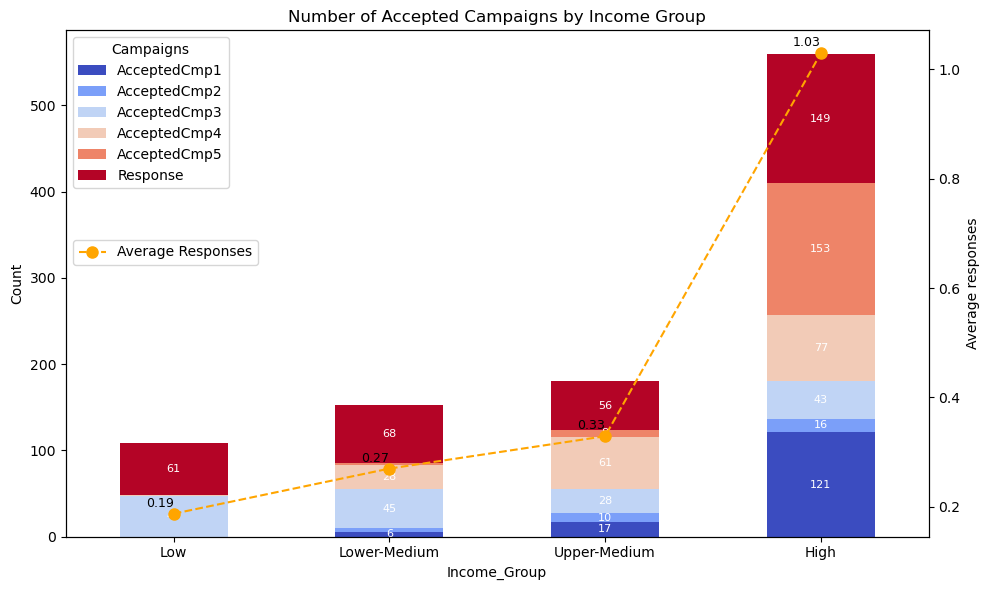

In [75]:
import matplotlib.pyplot as plt

# Graph the first stacked bar plot
ax1 = sum_accepted_campaign.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

ax2 = ax1.twinx()  # Create a secondary axis
# Assign input data
x2 = Income_Response['Income_Group']
y2 = Income_Response['total_response']

# Graph the second line plot with custom point size
line = ax2.plot(x2, y2, color='orange', marker='o', linestyle='--', markersize=8, label='Average Responses')

ax1.set_xlabel('Income_Group')
ax1.set_ylabel('Count')
ax2.set_ylabel('Average responses', color='black')

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 4:  # Only annotate if height is greater than 4
        ax1.annotate(f'{int(round(height))}', (x + width/2, y + height/2),
                     ha='center', va='center', fontsize=8, color='white')

plt.title('Number of Accepted Campaigns by Income Group')

# Move first legend inside the plot
ax1.legend(title='Campaigns', loc='upper left')

# Move second legend below the first legend but still inside the plot
ax2_legend = ax2.legend(loc='upper left', bbox_to_anchor=(0.0002, 0.6), ncol=2)
ax2_legend.set_in_layout(True)  # Prevent the second legend from overlapping with the plot

# Annotate points on the secondary axis
for i, txt in enumerate(y2):
    ax2.annotate(f'{int(txt)}', (x2[i], y2[i]), textcoords="offset points", xytext=(0,5),
                 ha='right', fontsize=9, color='black')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
plt.savefig('num_acceptedcam_vs_incomegroup.png')

1. The performance of the 2nd campaign is generally poor, as most people tend to reject it.
2. The last campaign attracts attention across all income groups.
3. The high-income group shows a higher acceptance rate for campaigns, with their acceptance rate being twice as high as other groups.
4. The average response to campaigns is similar between the low-income and lower-medium income groups. The turning point occurs between the lower-medium and upper-medium groups, with the latter showing approximately 5 clicks more on average.
5. The low-income group tends to accept campaigns mainly on the 3rd and last rounds, suggesting a focus on these rounds.
6. The lower-medium income group shows interest in the 3rd, 4th, and last campaigns but is less likely to accept the first two and the 5th campaign.
7. The upper-medium income group shows less interest in the first 3 rounds of campaigns but is more likely to participate in the 4th and last campaigns. In contrast, the high-income group shows a strong interest in the 1st campaign but less interest in the 2nd and 3rd campaigns. Surprisingly, high-income individuals accepted the 5th campaign the most compared to other groups, while other groups barely accepted the 5th campaign.



#### Observations of Campaign vs Income group ####


**Campaign Performance by Income Group:**
1. The High-income group has the highest acceptance rates across all campaigns, particularly for Campaign 1  and Campaign 5.
2. Lower-Medium income group has a moderate acceptance rate for most campaigns but shows a significant drop in acceptance for Campaign 1 
3. compared to the High-income group.
Upper-Medium income group also shows moderate acceptance rates but has a higher acceptance rate for Campaign 4.

**Campaign Preference Shift:**
1. There is a notable shift in campaign preference between the Lower-Medium and Upper-Medium income groups, especially seen in Campaign 4 where Upper-Medium income group shows a significant increase in acceptance compared to Lower-Medium.
3. Campaign 2 has low acceptance rates across all income groups, indicating that it may not resonate well with any specific income segment.

**Overall Response:**
1. The High-income group has the highest total responses (Response column) despite having lower acceptance rates for some campaigns, suggesting they may be more engaged or responsive overall.
2. The Lower-Medium income group has a higher acceptance rate for Campaign 3 compared to the Upper-Medium group, which could indicate a specific preference or alignment with the campaign's message for this income segment.

**Campaign Effectiveness Insights:**
1. Campaigns 1 and 5 seem to be more effective overall, especially for the High-income group, based on their higher acceptance rates and corresponding total responses.
2. Campaign 2 may need to be revisited as it has low acceptance rates across all income groups, indicating potential issues with the campaign's appeal or targeting.

**Targeted Campaign Strategy:**
1. Targeting specific campaigns towards the High-income group may yield better results, especially for Campaigns 1 and 5.
2. Understanding the preferences and behaviors of the Lower-Medium and Upper-Medium income groups can help tailor campaigns effectively to each segment's interests and needs.

### Find if the education plays a big role with the response campaign ###

In [30]:
# create a copy of main dataframe for education analysis 
education_camp = df[['Education','total_response']]

In [31]:
# find the average response among different education level
education_camp.groupby('Education')['total_response'].mean()

Education
2n Cycle      0.359606
Basic         0.148148
Graduation    0.439609
Master        0.432432
PhD           0.545267
Name: total_response, dtype: float64

In [32]:
# One-hot encode the 'Education' column
education_dummies = pd.get_dummies(education_camp['Education'], prefix='Education')

# Concatenate one-hot encoded columns with 'total_response'
education_encoded = pd.concat([education_dummies, education_camp['total_response']], axis=1)

# Calculate correlation
correlation = education_encoded.corr()

correlation


,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,total_response
Education_2n Cycle,1.000000,-0.049640,-0.317600,-0.140493,-0.166259,-0.031016
Education_Basic,-0.049640,1.000000,-0.158122,-0.069947,-0.082775,-0.052772
Education_Graduation,-0.317600,-0.158122,1.000000,-0.447526,-0.529601,-0.008432
Education_Master,-0.140493,-0.069947,-0.447526,1.000000,-0.234274,-0.007316
Education_PhD,-0.166259,-0.082775,-0.529601,-0.234274,1.000000,0.058060
total_response,-0.031016,-0.052772,-0.008432,-0.007316,0.058060,1.000000


#### Conclusion: ####

The average response is pretty much stays at the same number within different education level. 
Based on this correlation matrix, there are weak linear relationships between education categories and total response. 
The correlations are close to zero, indicating that education categories, as represented in this analysis, 
have limited predictive power or influence on the total response variable. 
It's important to note that correlation does not imply causation, 
and other factors not considered in this analysis may influence the response rates more significantly.

### Find if the marital status plays a big role with the response campaign ###

In [64]:
marital_camp = df[['Marital_Status','total_response','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response',]]

In [65]:
marital_camp.head()

,Marital_Status,total_response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Divorced,1,0,0,0,0,0,1
1,Single,2,0,1,0,0,0,1
2,Married,0,0,0,0,0,0,0
3,Together,0,0,0,0,0,0,0
4,Single,2,0,0,1,0,0,1


In [66]:
# One-hot encode the 'Education' column
marital_dummies = pd.get_dummies(marital_camp['Marital_Status'], prefix='Marital_Status')

# Concatenate one-hot encoded columns with 'total_response'
marital_encoded = pd.concat([marital_dummies, marital_camp['total_response']], axis=1)

# Calculate correlation
matrial_correlation = marital_encoded.corr()

matrial_correlation

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,total_response
Marital_Status_Absurd,1.000000,-0.001095,-0.010166,-0.023702,-0.015620,-0.017659,-0.005643,-0.000894,0.035355
Marital_Status_Alone,-0.001095,1.000000,-0.012454,-0.029036,-0.019134,-0.021633,-0.006913,-0.001095,0.009033
Marital_Status_Divorced,-0.010166,-0.012454,1.000000,-0.269511,-0.177606,-0.200796,-0.064163,-0.010166,0.020207
Marital_Status_Married,-0.023702,-0.029036,-0.269511,1.000000,-0.414089,-0.468156,-0.149597,-0.023702,-0.027068
Marital_Status_Single,-0.015620,-0.019134,-0.177606,-0.414089,1.000000,-0.308513,-0.098584,-0.015620,0.035936
Marital_Status_Together,-0.017659,-0.021633,-0.200796,-0.468156,-0.308513,1.000000,-0.111456,-0.017659,-0.035344
Marital_Status_Widow,-0.005643,-0.006913,-0.064163,-0.149597,-0.098584,-0.111456,1.000000,-0.005643,0.034611
Marital_Status_YOLO,-0.000894,-0.001095,-0.010166,-0.023702,-0.015620,-0.017659,-0.005643,1.000000,0.001777
total_response,0.035355,0.009033,0.020207,-0.027068,0.035936,-0.035344,0.034611,0.001777,1.000000


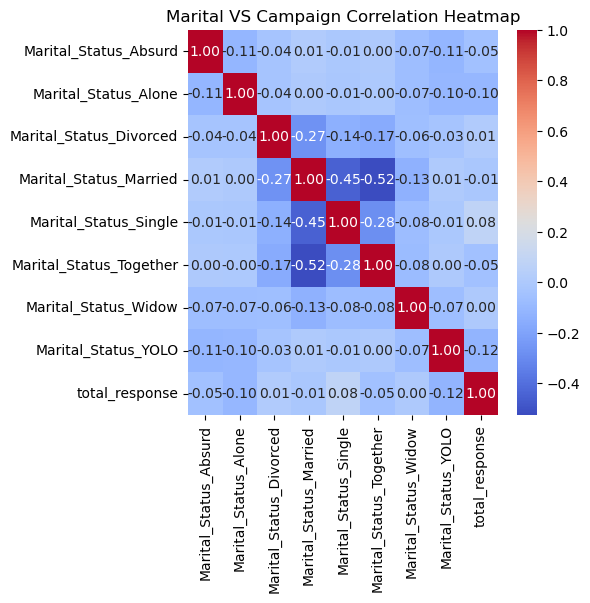

In [74]:
corr_marital_df = pd.DataFrame(matrial_correlation)

# Create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_marital_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Marital VS Campaign Correlation Heatmap')
plt.show()

The correlation matrix suggests that marital status alone may not be a strong predictor of customer response or behavior.

## **RFM Analysis** ##

In [81]:
# the purchase frequency within last 2 years.
df["Frequency"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
# Monetary measures the total monetary expenditure within last 2 years.
df["Monatery"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"] 

#### create a RFM module ####

In [87]:
rfm = df[['Recency','Frequency','Monatery']]

In [89]:
#scaling data 
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled)
#Renaming the columns
rfm_scaled.columns = ["recency","frequency","monatery"]
rfm_scaled.head()

,recency,frequency,monatery
0,-1.696333,0.017745,0.969807
1,-1.696333,0.408536,-0.048230
2,-1.696333,-0.503310,-0.589633
3,-1.696333,-1.415155,-0.988211
4,-1.696333,-0.894101,-0.855352


#### Elbow Method ####
Use Elbow Method to find K value for modeling 

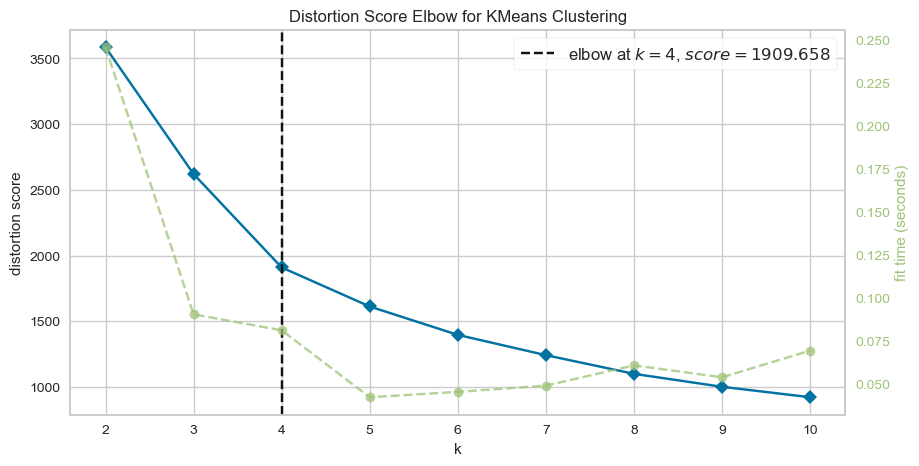

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
#import the library needed
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs

# Random initailazing of k=10 to plot graph and find Elbow
plt.figure(figsize=(10,5))
EM = KElbowVisualizer(KMeans(), k=10) 
EM.fit(rfm_scaled)
EM.show()

#### KMeans ####

In [94]:
#KMeans Clustering
# k = 4 based on the elbow method
kms = KMeans(n_clusters=4,max_iter=50)
kms.fit(rfm_scaled)

KMeans(max_iter=50, n_clusters=4)

In [96]:
#Access cluster labels for all dataframe for further analysis
df['cluster']= kms.labels_
rfm_scaled["clusters"]= kms.labels_
rfm["clusters"]= kms.labels_
rfm_scaled.head()

,recency,frequency,monatery,clusters
0,-1.696333,0.017745,0.969807,0
1,-1.696333,0.408536,-0.048230,0
2,-1.696333,-0.503310,-0.589633,1
3,-1.696333,-1.415155,-0.988211,1
4,-1.696333,-0.894101,-0.855352,1


<function matplotlib.pyplot.show(close=None, block=None)>

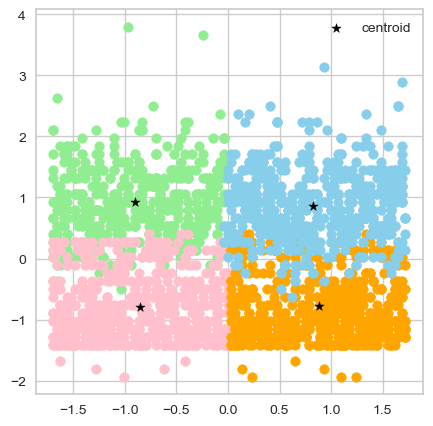

In [105]:
# grouping the data in terms of cluster seperately
gp1 = rfm_scaled[rfm_scaled["clusters"]==0]
gp2 = rfm_scaled[rfm_scaled["clusters"]==1]
gp3 = rfm_scaled[rfm_scaled["clusters"]==2]
gp4 = rfm_scaled[rfm_scaled["clusters"]==3]

#Lets check the quality of clustering in the data set
plt.figure(figsize=(5,5))
plt.scatter(gp1["recency"],gp1["frequency"],color='lightgreen')
plt.scatter(gp2["recency"],gp2["frequency"],color='pink')
plt.scatter(gp3["recency"],gp3["frequency"],color='orange')
plt.scatter(gp4["recency"],gp4["frequency"],color='skyblue')
plt.scatter(kms.cluster_centers_[:,0],kms.cluster_centers_[:,1],color="black",marker="*",label="centroid")
plt.legend()
plt.show 

Overall most of the data is near the center point, only few outlier;
the quality of the clustering is good.

#### Boxplot of each RFM value ####

Text(0.5, 1.0, 'Recency VS Clusters')

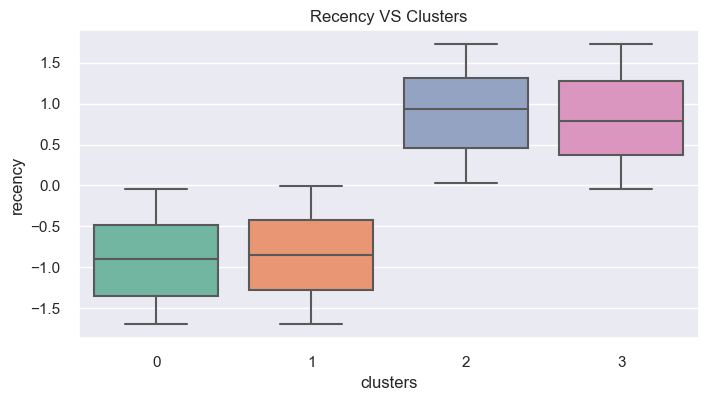

In [110]:
#the Boxplot : recency of each clusters
sns.set(rc={"figure.figsize":(8, 4)})
sns.boxplot(x="clusters",y="recency",data=rfm_scaled, palette='Set2').set_title("Recency VS Clusters")

Text(0.5, 1.0, 'Frequency VS Clusters')

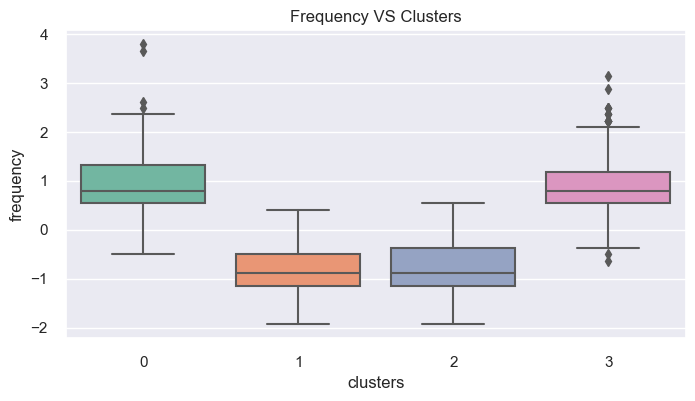

In [111]:
#the Boxplot : frequency of each clusters
sns.boxplot(x="clusters",y="frequency",data=rfm_scaled, palette='Set2').set_title("Frequency VS Clusters")

Text(0.5, 1.0, 'Monatery VS Clusters')

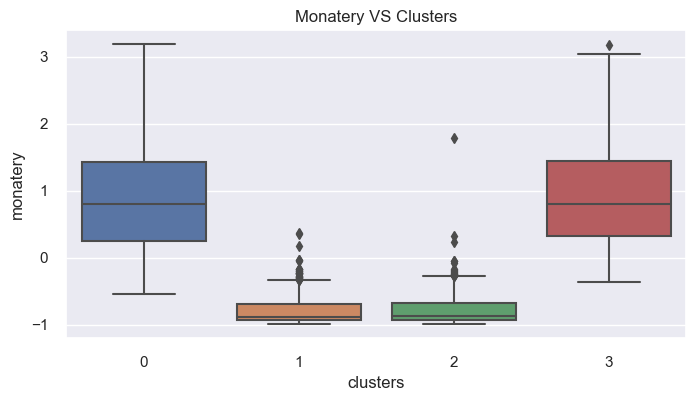

In [112]:
#the Boxplot : monatery of each clusters
sns.boxplot(x="clusters",y="monatery",data=rfm_scaled).set_title("Monatery VS Clusters")

In [113]:
# create rfm score based on the max and min value of recency, frequency and monatery. 
# RFM score tiers (cut into 5 based on the max and min )
bins1 = np.linspace(rfm["Recency"].min(),rfm["Recency"].max(),6)
# the lower recency the better which indicates the customer shop recently, so the rscore is higher
rfm["r_score"] = pd.cut(rfm["Recency"],bins1,labels=[5,4,3,2,1],include_lowest=True)

bins2 = np.linspace(rfm["Frequency"].min(),rfm["Frequency"].max(),6)
rfm["f_score"] = pd.cut(rfm["Frequency"],bins2,labels=[1,2,3,4,5],include_lowest=True)

bins3 = np.linspace(rfm["Monatery"].min(),rfm["Monatery"].max(),6)
rfm["m_score"] = pd.cut(rfm["Monatery"],bins3,labels=[1,2,3,4,5],include_lowest=True)

rfm["RFM SCORE"] = rfm["r_score"].astype(str) + rfm["f_score"].astype(str)
rfm.head()

,Recency,Frequency,Monatery,clusters,r_score,f_score,m_score,RFM SCORE
0,0,15,1190,0,5,2,3,52
1,0,18,577,0,5,3,2,53
2,0,11,251,1,5,2,1,52
3,0,4,11,1,5,1,1,51
4,0,8,91,1,5,1,1,51


In [119]:
# Group by RFM score and calculate summary statistics
rfm_scores_summary = rfm.groupby("RFM SCORE").agg({
    "Recency": ["count", "mean", "median"],
    "Frequency": ["mean", "median"],
    "Monatery": ["mean", "median"]
})

# Rename columns for better interpretation
rfm_scores_summary.columns = ["Count", "Avg_Recency", "Median_Recency",
                               "Avg_Frequency", "Median_Frequency",
                               "Avg_Monetary", "Median_Monetary"]

# Sort the table by RFM score for better visualization
rfm_scores_summary = rfm_scores_summary.sort_index()

# Display the RFM score decision table
rfm_scores_summary

,Count,Avg_Recency,Median_Recency,Avg_Frequency,Median_Frequency,Avg_Monetary,Median_Monetary
RFM SCORE,,,,,,,
11,133,88.714286,89.0,5.962406,6.0,54.293233,50.0
12,136,89.544118,89.0,12.941176,13.0,406.720588,257.0
13,156,89.320513,90.0,21.871795,22.0,1128.974359,1064.5
14,21,88.666667,88.0,29.285714,29.0,1338.285714,1229.0
15,1,98.000000,98.0,37.000000,37.0,1608.000000,1608.0
21,116,70.068966,71.0,5.870690,6.0,54.594828,45.0
22,141,70.382979,71.0,13.191489,13.0,559.964539,296.0
23,152,68.565789,68.5,21.118421,21.0,1100.828947,1035.5
24,27,67.703704,69.0,29.148148,28.0,1190.074074,1174.0


In [120]:
# name each segements 
dict_seg = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM SCORE'].replace(dict_seg, regex = True)
df['segment'] = rfm['RFM SCORE'].replace(dict_seg, regex = True) 
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,total_response,response_rate,Income_Group,Frequency,Monatery,cluster,segment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,Spain,1,1.000000,High,15,1190,0,potential_loyalists
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,Canada,2,0.400000,Upper-Medium,18,577,0,potential_loyalists
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,USA,0,0.000000,Upper-Medium,11,251,1,potential_loyalists
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,Australia,0,0.000000,Low,4,11,1,new_customers
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,Spain,2,0.285714,Low,8,91,1,new_customers


In [129]:
# Initialize an empty list to hold dataframes for each cluster
cluster_dfs = []

# Loop through each cluster number
for cluster_num in range(4):
    # Filter dataframe based on cluster number
    cluster_df = df[df["cluster"] == cluster_num]
    
    # Assign names c1, c2, c3, c4 to the dataframes
    if cluster_num == 0:
        c1 = cluster_df
    elif cluster_num == 1:
        c2 = cluster_df
    elif cluster_num == 2:
        c3 = cluster_df
    elif cluster_num == 3:
        c4 = cluster_df
    
    # Append the dataframe to cluster_dfs list
    cluster_dfs.append(cluster_df)

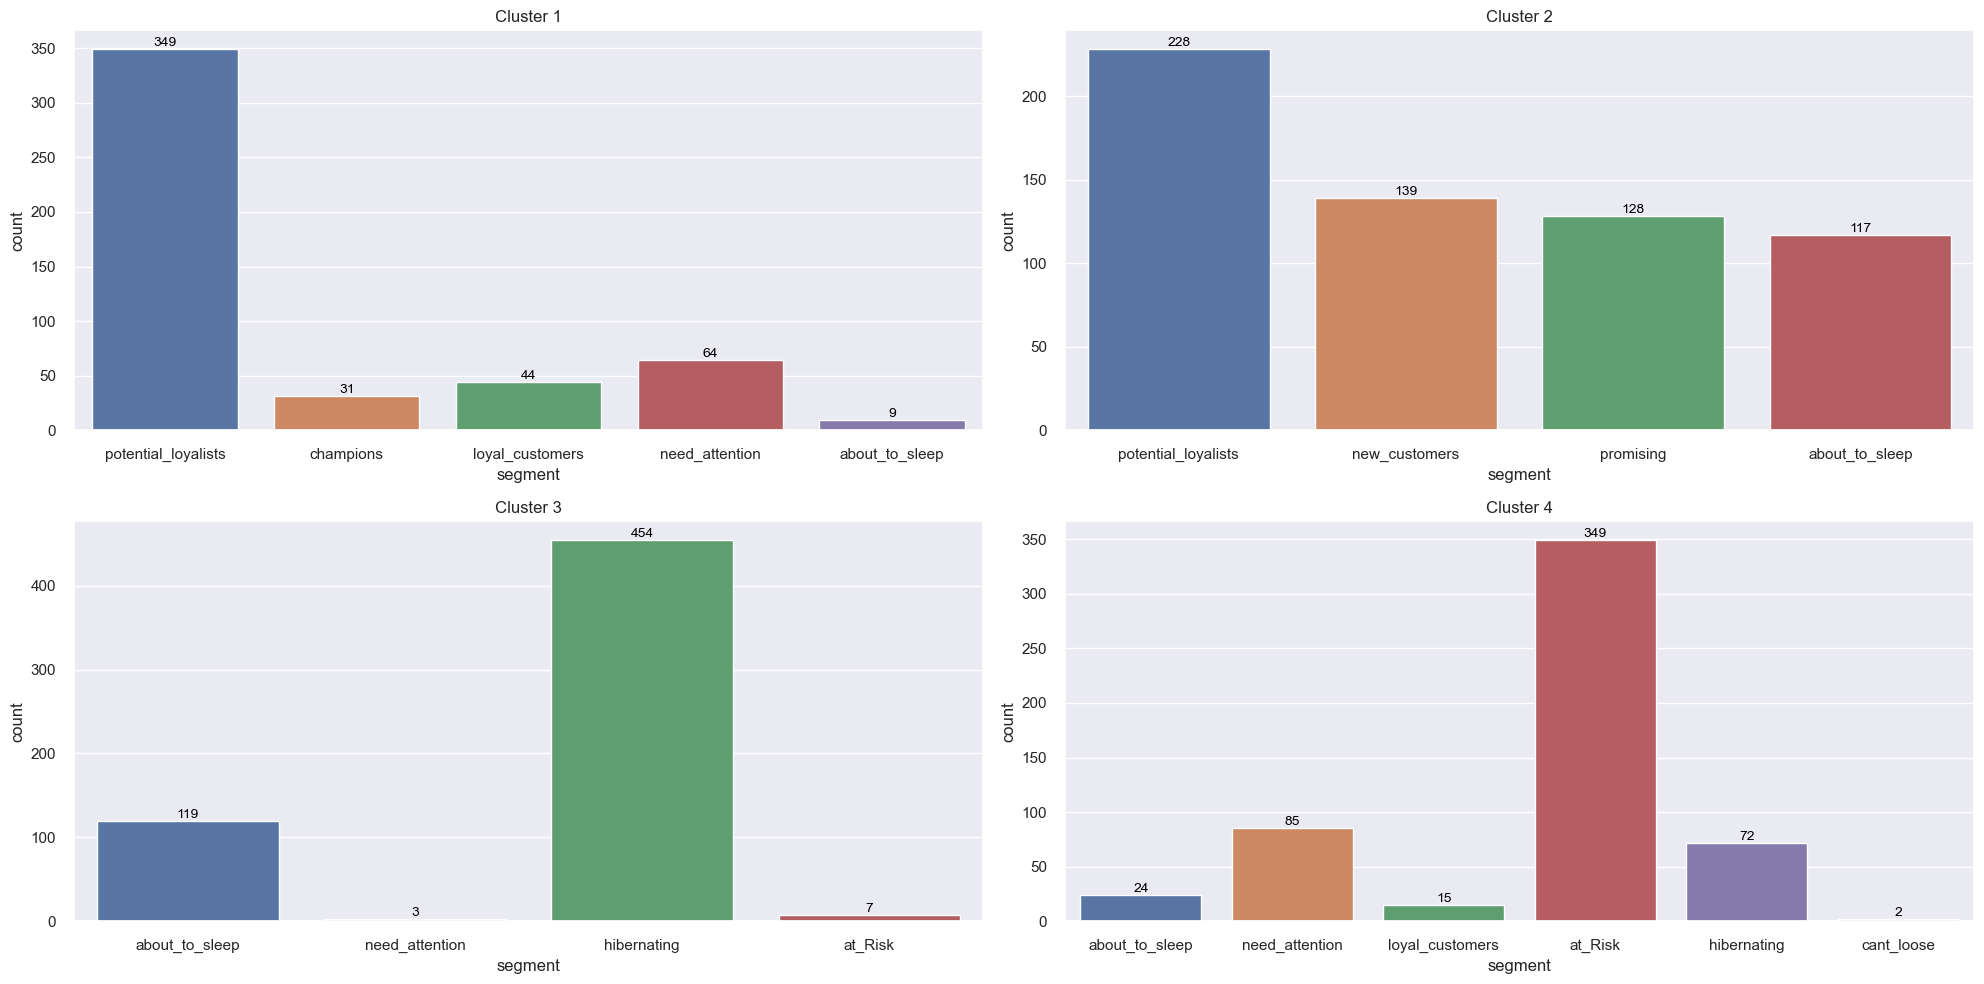

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Segregate dataframe w.r.t its cluster
clusters = [c1, c2, c3, c4]
cluster_titles = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

# Create a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop through each cluster and plot countplot with title and annotations
for i, (cluster_df, title) in enumerate(zip(clusters, cluster_titles)):
    ax = sns.countplot(x="segment", data=cluster_df, ax=axs[i])
    ax.set_title(title)
    
    # Add annotations for each bar
    for p in ax.patches:
        height = int(round(p.get_height()))  # Round to integer
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0,0),
                textcoords='offset points')


# Adjust spacing between subplots and show the plot
plt.tight_layout()
plt.show()


1. **cluster 1 New Customers:** large amount of potential loyalists
   
2. **cluster 2 Churned Customers:** moderate number of new customer, promisiong and about sleep, number of potential loyalists is large
   
3. **cluster 3 Inactive Customers:** large number hibernating, moderate number of about to sleep
   
    Large number of hibernating customers.
    Moderate number of customers about to sleep.
4. **cluster 4 Risky Customers :** large number of at rish, moderate number of hibernating and neet_attention
   Large number of at-risk customers.
    Moderate number of hibernating customers and those needing attention.
   
   